In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [13,8]
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv("Dataset/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## checking for null values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<AxesSubplot:>

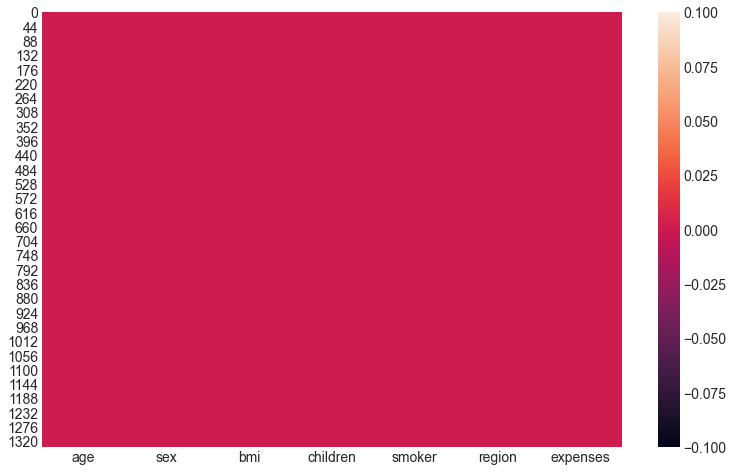

In [9]:
sns.heatmap(df.isnull())

In [10]:
corr = df.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

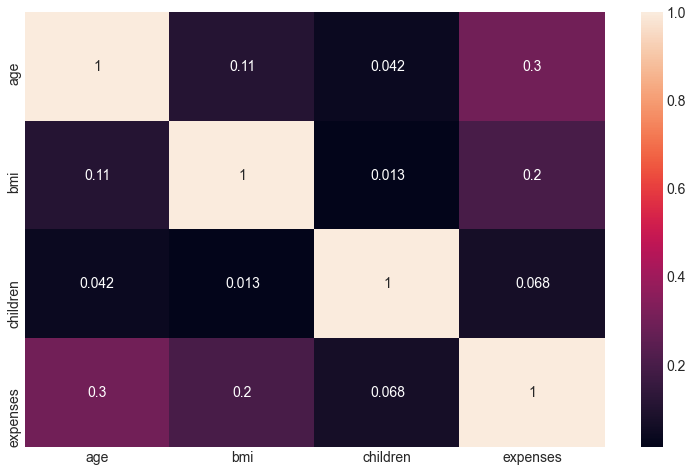

In [11]:
sns.heatmap(corr,annot=True)

## encoding categorical columnvalues

In [12]:
categorical_columns = ["sex","children","smoker","region"] #list of cat col names

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df_encode = pd.get_dummies(data=df,prefix="OHE",prefix_sep="_",columns=categorical_columns,drop_first=True,dtype="int8")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [16]:
df_encode.head()

,age,bmi,expenses,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0


### as the values of expense column is too big we take the log of each value
### it also removed the outlier

In [17]:
df_encode["expenses"] = np.log(df_encode["expenses"])

In [18]:
print(df_encode["expenses"].skew())
print(df["expenses"].skew())

-0.0900974307762623
1.51587966289798


In [19]:
df_encode["expenses"].describe()

count    1338.000000
mean        9.098659
std         0.919527
min         7.022752
25%         8.463853
50%         9.146551
75%         9.719558
max        11.063045
Name: expenses, dtype: float64

## outlier is removed as show by the box plot

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

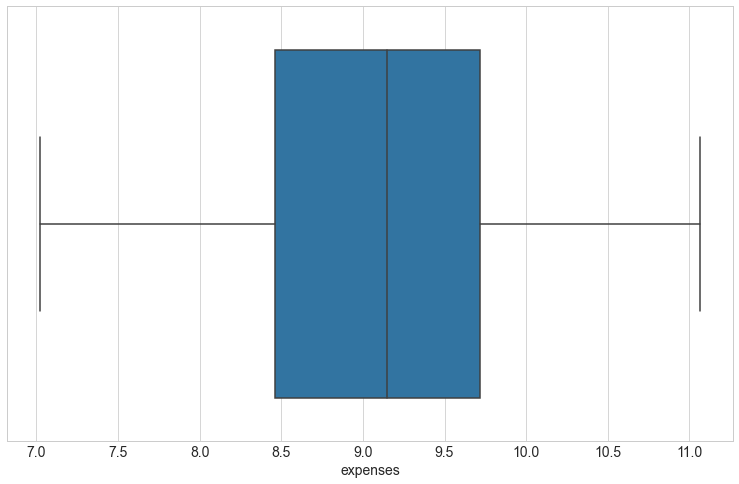

In [20]:
sns.boxplot(df_encode["expenses"])


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

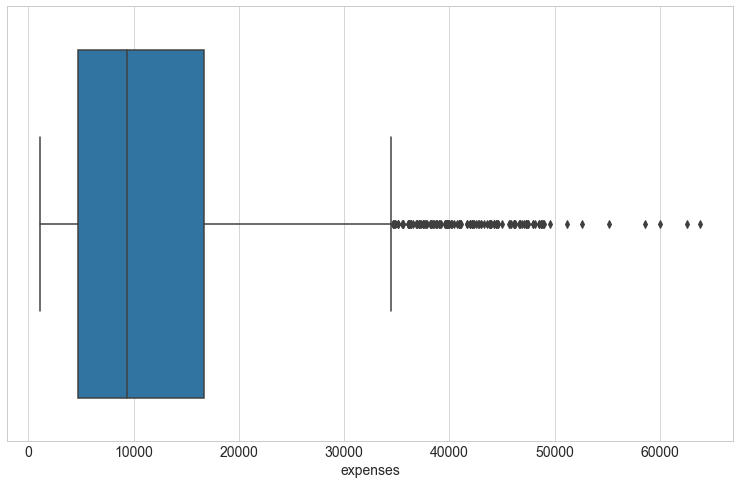

In [21]:
## outlier before log encode
sns.boxplot(df["expenses"])

In [22]:
df_encode.head()

,age,bmi,expenses,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.8,7.453301,1,1,0,0,0,0,0,0,1,0
2,28,33.0,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.7,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.9,8.260198,1,0,0,0,0,0,0,1,0,0


In [23]:
y = df_encode["expenses"]
X = df_encode.drop("expenses",axis=1)


In [24]:
X.shape

(1338, 12)

In [25]:
y.shape

(1338,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=324)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(1070, 12)
(268, 12)
(1070,)


(268,)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in model:
    i.fit(X_train, y_train)

In [30]:
y_pred_train = []
for i in model:
    y_pred_train.append(i.predict(X_train))

### Evalulating on the training data

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
for c,i in enumerate(model):
    mse = mean_squared_error(y_train, y_pred_train[c])
    rmse = np.sqrt(mse)
    print(f"{i} RMSE value : {rmse}")

LinearRegression() RMSE value : 0.44817221542851343
DecisionTreeRegressor() RMSE value : 0.06772998096220374
RandomForestRegressor() RMSE value : 0.16735034442102845


### Evalulating on the testing data

In [33]:
y_pred = []
for i in model:
    y_pred.append(i.predict(X_test))

In [34]:
for c,i in enumerate(model):
    mse = mean_squared_error(y_test, y_pred[c])
    rmse = np.sqrt(mse)
    print(f"{i} RMSE value : {rmse}")

LinearRegression() RMSE value : 0.41155139099720733
DecisionTreeRegressor() RMSE value : 0.5676835788173205
RandomForestRegressor() RMSE value : 0.37438429584271465


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='expenses'>

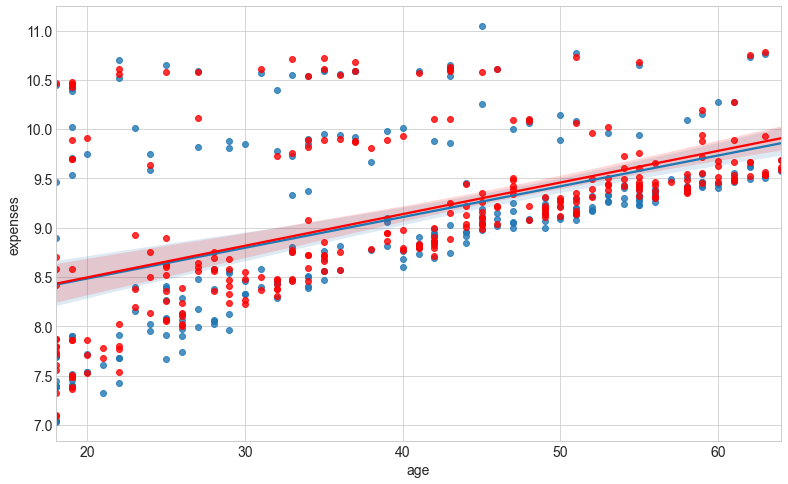

In [35]:
sns.regplot(X_test["age"],y_test)
sns.regplot(X_test["age"],y_pred[2],color='red')

## we can see the red line(prediction) and the blue line(True value) nearly coincide with each 

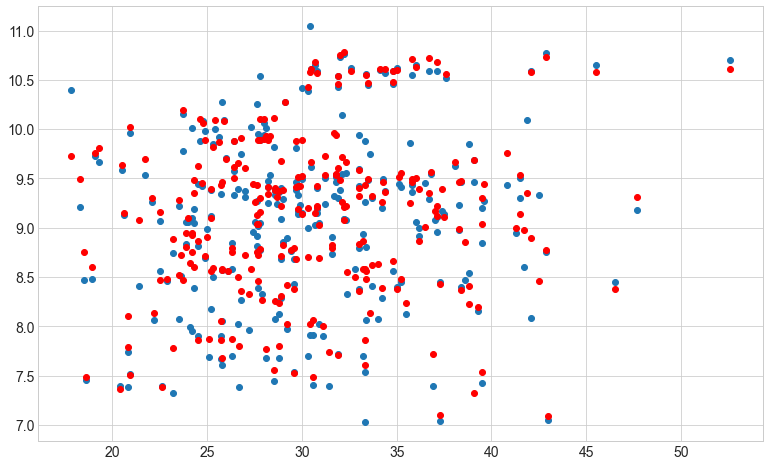

In [36]:
plt.scatter(X_test["bmi"],y_test)
plt.scatter(X_test["bmi"],y_pred[2],color='red')